In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df_mlp = pd.read_csv("df_cbd_bert.csv")

In [3]:
df_mlp

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..CBD
0,8,0.300818,0.117299,0.643727,0.152582,0.012138,-0.430934,0.801716,0.031614,-0.120514,...,0.128118,0.140427,-0.141514,0.348772,-0.738661,0.141317,-0.830303,-0.177379,-0.900806,0.001046
1,14,0.124309,0.161562,0.573033,-0.019954,0.059185,-0.295751,0.495331,0.220471,-0.019156,...,0.135187,0.180882,-0.089732,0.199170,-0.706113,-0.035785,-0.544304,-0.166163,-0.541058,0.001046
2,15,-0.232188,0.163139,0.578652,-0.003896,0.093456,-0.162398,0.253359,0.544303,0.089369,...,-0.074476,0.142927,-0.040942,0.006959,-0.400928,-0.109898,-0.293222,-0.007909,-0.331629,0.001046
3,18,0.159101,0.116514,0.596216,0.099526,0.017107,-0.422273,0.761935,0.105024,-0.073867,...,0.134182,0.147276,-0.084956,0.301484,-0.769129,0.131591,-0.821295,-0.163698,-0.824827,0.001046
4,18,0.159101,0.116514,0.596216,0.099526,0.017107,-0.422273,0.761935,0.105024,-0.073867,...,0.134182,0.147276,-0.084956,0.301484,-0.769129,0.131591,-0.821295,-0.163698,-0.824827,0.001046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42969,0.212347,0.124677,0.604793,0.083085,0.034133,-0.408407,0.786280,0.111345,-0.127262,...,0.161177,0.153434,-0.125303,0.314786,-0.765685,0.128396,-0.816410,-0.213200,-0.849931,0.001046
59996,42970,0.109320,0.095256,0.523631,-0.007430,0.055264,-0.338708,0.570877,0.232808,-0.009438,...,0.124365,0.174935,-0.110914,0.197620,-0.678949,0.039182,-0.663883,-0.163899,-0.593018,0.001046
59997,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.001046
59998,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.001046


In [5]:
X = df_mlp.drop(['index', 'X..CBD'], axis = 1)
y = df_mlp[['X..CBD']]

Plotting histograms on target variable

<AxesSubplot:ylabel='Count'>

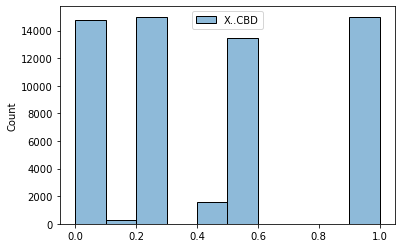

In [6]:
sns.histplot(y, bins = 10)

PCA

In [7]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [8]:
pca_comps

array([[-2.53000181e+00,  7.98126649e-01,  1.26331021e-01, ...,
         2.24271770e-03,  2.05093158e-04, -3.61987764e-08],
       [ 3.28699595e+00, -4.76076871e-02,  1.14222242e-01, ...,
         6.27569052e-03,  2.03573645e-03,  3.82853697e-09],
       [ 8.91039748e+00,  2.77049108e+00,  5.46733838e-01, ...,
         7.22619290e-03, -1.20367086e-02,  3.40673280e-08],
       ...,
       [ 1.31141412e+00, -5.75570658e-01, -5.08822535e-01, ...,
         5.77675070e-03,  2.17679982e-03, -3.11328201e-08],
       [-1.88182263e+00,  3.99537992e-01, -2.76986941e-01, ...,
         4.27086885e-03, -2.00572276e-03,  7.75993725e-09],
       [-2.79795975e+00,  1.12855332e+00, -1.01446531e-01, ...,
        -9.09611857e-04, -1.35556303e-04, -6.59391122e-08]])

In [9]:
type(pca_comps)

numpy.ndarray

In [10]:
explained_variance = pca.explained_variance_ratio_

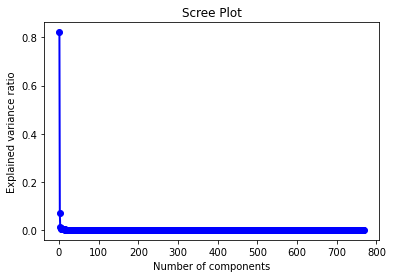

In [11]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [12]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [13]:
n_components_optimal

1

In [14]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [15]:
X_reduced

array([[-2.53000181],
       [ 3.28699595],
       [ 8.91039748],
       ...,
       [ 1.31141412],
       [-1.88182263],
       [-2.79795975]])

train test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [17]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

MLP (before feature selection and hyperparameter tuning)

In [18]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
mean_absolute_error(y_val, y_pred_mlp)

0.3101676734276484

In [20]:
mean_squared_error(y_val, y_pred_mlp)

0.13155595068674975

In [21]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.36270642493172045

In [22]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.024983808605094193

In [23]:
#val
r2_score(y_val, y_pred_mlp)

0.020594458426632545

Hyperparameter tuning (MLP)

In [24]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [25]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [26]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [27]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [28]:
joblib.dump(rscv, "rscv_mlp_bert_cbd.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_bert_best_params_cbd.pkl")

['rscv_mlp_bert_best_params_cbd.pkl']

MLP (after hyperparameter tuning)

In [29]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=1000, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.3069940923947464

In [31]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.13077042166653424

In [32]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.36162193194900977

In [33]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.03158319558740508

In [34]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.02644255173939858

Predicting on the test set (MLP)

In [35]:
y_pred_mlp_test = mlpreg_ht.predict(X_test)

In [36]:
joblib.dump(y_pred_mlp_test, "y_pred_mlp_test_bert_cbd.pkl")
joblib.dump(y_test, "y_test_mlp_bert_cbd.pkl")

['y_test_mlp_bert_cbd.pkl']

In [37]:
mean_absolute_error(y_test, y_pred_mlp_test)

0.30500875255478604

In [38]:
mean_squared_error(y_test, y_pred_mlp_test)

0.1290330476019938

In [39]:
mean_squared_error(y_test, y_pred_mlp_test, squared = False)

0.3592117030415265

In [40]:
r2_score(y_test, y_pred_mlp_test)

0.028448111752797378

Error analysis (kNN)

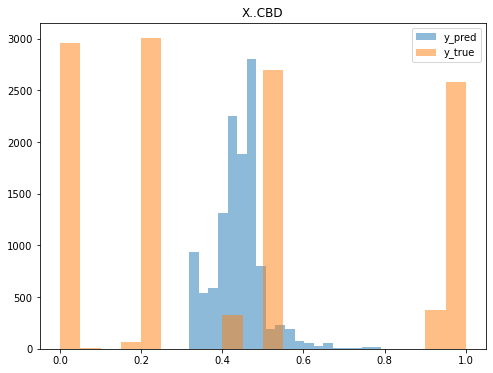

<Figure size 432x288 with 0 Axes>

In [41]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBD"  # specify the target variable name
ax.hist(y_pred_mlp_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_bert_cbd.png')

Pearson R

In [42]:
corr_coef, p_value = pearsonr(y_pred_mlp_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.169
P-value: 0.000


<AxesSubplot:>

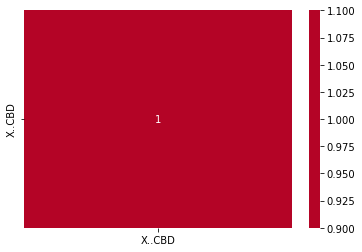

In [43]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)